In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/satellite.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "/content/satellite/train",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 954 images belonging to 2 classes.


In [ ]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "/content/satellite/test",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 721 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [ ]:

from tensorflow.keras.regularizers import l2

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
30/30 [==============================] - 2s 64ms/step - loss: 0.9354 - accuracy: 0.5650 - val_loss: 0.9384 - val_accuracy: 0.6533
Epoch 2/15
30/30 [==============================] - 2s 60ms/step - loss: 0.6674 - accuracy: 0.7432 - val_loss: 0.4645 - val_accuracy: 0.8280
Epoch 3/15
30/30 [==============================] - 2s 61ms/step - loss: 0.4661 - accuracy: 0.7966 - val_loss: 0.4563 - val_accuracy: 0.8391
Epoch 4/15
30/30 [==============================] - 2s 64ms/step - loss: 0.3464 - accuracy: 0.8459 - val_loss: 0.3550 - val_accuracy: 0.8433
Epoch 5/15
30/30 [==============================] - 2s 59ms/step - loss: 0.3692 - accuracy: 0.8333 - val_loss: 0.4231 - val_accuracy: 0.8086
Epoch 6/15
30/30 [==============================] - 2s 59ms/step - loss: 0.3268 - accuracy: 0.8595 - val_loss: 0.3692 - val_accuracy: 0.8322
Epoch 7/15
30/30 [==============================] - 2s 60ms/step - loss: 0.2861 - accuracy: 0.8700 - val_loss: 0.3406 - val_accuracy: 0.8669
Epoch 8/15
30

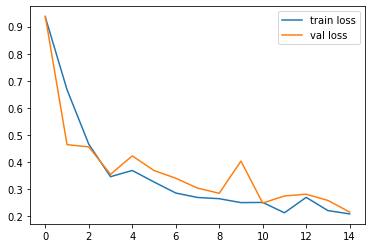

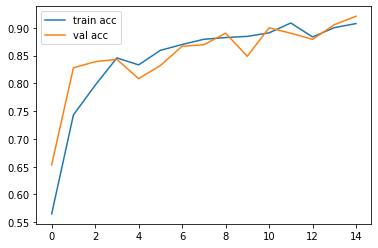

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

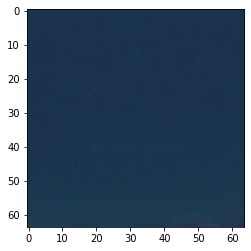

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
test_image = image.load_img('/content/SeaLake_16.jpg', target_size = (64,64))
plt.imshow(test_image)


In [ ]:
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 103ms/step


In [ ]:
if result[0]<0:
    print("The image classified is sea")
else:
    print("The image classified is forest")

The image classified is sea


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
Y_pred = cnn.predict_generator(test_set, 721// 32+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))


Confusion Matrix
[[358   0]
 [363   0]]


In [ ]:
print('Classification Report')
target_names = ['sea', 'forest']
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

         sea       0.50      1.00      0.66       358
      forest       0.00      0.00      0.00       363

    accuracy                           0.50       721
   macro avg       0.25      0.50      0.33       721
weighted avg       0.25      0.50      0.33       721



In [ ]:
scores=cnn.evaluate(test_set)

23/23 [==============================] - 0s 17ms/step - loss: 0.2158 - accuracy: 0.9209
